# APS1070
#### Linear Regression - Project 4

Please fill out the following:


*   Your **name**: **Khashayar Ebrahimi**
*   Your **student number**:



## How to use this Notebook

1. Run the cells to get a bird's eye view of whats going on.
2. Interact with the code to better understand how it works - add cells, plot values, change parameters, etc.
3. (Optional) Replicate Linear Regression code on a blank notebook, without viewing this code. [This is called retrieval practice.](https://www.learningscientists.org/blog/2016/6/23-1)
4. Complete exercises.

## Linear Regression - Introduction

### Linear Regression

In statistics, linear regression is a linear approach to modelling the relationship between a dependent variable and one or more independent variables. Let X be the independent variable and Y be the dependent variable. We will define a linear relationship between these two variables as follows:

$y = mX + c$

This is the equation for a line that you studied in high school. m is the slope of the line and c is the y intercept. Today we will use this equation to train our model with a given dataset and predict the value of Y for any given value of X. Our challenge today is to determine the value of m and c, such that the line corresponding to those values is the best fitting line or gives the minimum error.

Are we always fitting a line into the data? What if we have more than 1 feature (independant variable)?

The vectorized form of above equation is written as $y = Xw$, where y and w are vectors while X is a matrix. 

Where is the c term? It is included within the X matrix.

**Hypothesis of Linear Regression**

The linear regression model can be represented by the following equation:

<img src="https://miro.medium.com/max/313/1*A32yDrkQKIU0Z-Nf7JD9Pg.png">

- Y is the predicted value ($h_\theta(x)$)
- θ₀ is the bias term.
- θ₁,…,θₙ are the model parameters
- x₁, x₂,…,xₙ are the feature values.

### LR - Procedure

Our Loss function for Linear regression would be sum of squares, which makes the cost function to be:

<img src="https://miro.medium.com/max/300/1*_y5QA1yF4w6LDDRxfTt6GA.jpeg">

Here yᵢ is the actual value and ȳᵢ is the predicted value. Lets substitute the value of ȳᵢ from $y = mX + c$:

<img src="https://miro.medium.com/max/400/1*3cpC7oHy4IbH3o3Jc-ygVw.jpeg">

Partial Derivative of the above equation with respect to m is shown as $D_m$:

<img src="https://miro.medium.com/max/400/1*FvYfCBrl2gX9K-KxSO1eIw.jpeg">

While the Partial Derivative with respect to c is shown as $D_c$:

<img src="https://miro.medium.com/max/300/1*rj09w2TcBxnHPtQ0oq4ehA.jpeg">

#### Analytical Approach for Linear Regression

Can you derive the Analytical Solution for Linear Regression?

We arrive at the analytical solution when we turn the partial derivatives with respect to the parameters to zero. Why?

This is because at the point where cost function is at the minimum with respect to the parameters (m and c), the derivative of cost function with respect to the parameters would be zero.

$D_m=0$ and $D_c=0$

The solution for the general case comes out to be:

<img src="https://sebastianraschka.com/images/faq/closed-form-vs-gd/closed-form.png">

With $L_2$ Regularization. Cost:

$J(\theta) = \frac{1}{2m}[\sum_{i=1}^m(h_\theta (x^{(i)}) - y^{(i)})^2 + \lambda\sum_{j=1}^n\theta^2_j]$

$w = (X^TX + \lambda I)^{-1}X^Ty$

#### Gradient Descent Solution

Gradient descent uses the equations for gradient derived above to find the direction in which we tinker the values of our parameters m and c. 

<img src="https://miro.medium.com/max/300/1*JDcHqFK8jLcgQu1cj2XuVQ.jpeg">

Here the term $L$ is defined as the learning rate.

<img src="https://miro.medium.com/max/864/1*CjTBNFUEI_IokEOXJ00zKw.gif">

#### Any other solutions methods?

Some other solution methods are QR Decomposition, Singular-Value Decomposition.

- Do these methods give exact solutions?
- Do these methods scale well with large datasets?

## Let's Start

Single Feature, 5 data points.

### Analytical Approach in Code

Let's get our hands dirty.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [0]:
n = 5 # number of points
m = 2 # slope of line
c = 4 # y intercept of line
r = 2 # range of data on x-axis

np.random.seed(2)
x = r * np.random.rand(n)
x.sort()
yPerf = m*x + c # perfect world: no noise
y = m*x + c + np.random.randn(n) # imperfect world: we get noisy data

Spoiler Alert: We are in an Imperfect World.

In [0]:
def rmse(yPred, y):
    return np.sqrt(mean_squared_error(yPred, y))

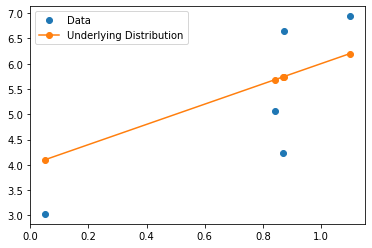

In [0]:
plt.plot(x, y, 'o', label='Data')
plt.plot(x, yPerf, 'o-', label='Underlying Distribution')

plt.legend()
plt.show()

In [0]:
x = np.vstack((np.ones(np.shape(x)), x)).T
y = y.reshape(-1, 1)

In [0]:
# analytical solution
w = np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))

# prediction
yPred = np.dot(x, w)

In [0]:
w[0], w[1]


(array([2.67741212]), array([3.35314632]))

- How similar are these to the values we had set initially?
- Will they be same as those set initially if there was no noise?

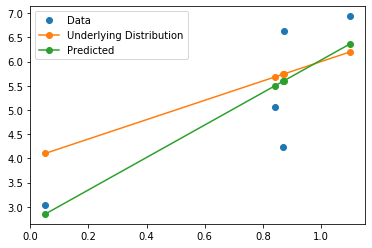

In [0]:
plt.plot(x[:, 1], y, 'o', label='Data')
plt.plot(x[:, 1], yPerf, 'o-', label='Underlying Distribution')
plt.plot(x[:, 1], yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

In [0]:
print('RMSE: ', rmse(yPred, y))

RMSE:  0.8321853483360432


### Complex Dependant Variable

It's complicated.

In [0]:
n = 20 # number of points
m = 3  # slope of line
c = 10 # y intercept of line
r = 2  # range of data on x-axis

np.random.seed(10)
X = xD = r * np.random.randn(n) # points also stored in xD (xData). will be useful later.
X.sort()
yPerf = X - 2 * (X ** 2) + 0.5 * (X ** 3)
np.random.seed(10)
y = X - 2 * (X ** 2) + 0.5 * (X ** 3) + np.random.normal(0, 5, n) # imperfect world: we get noisy data

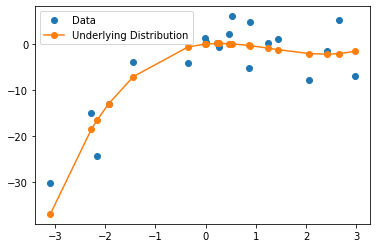

In [0]:
plt.plot(X, y, 'o', label='Data')
plt.plot(X, yPerf, 'o-', label='Underlying Distribution')

plt.legend()
plt.show()

In [0]:
X = np.vstack((np.ones(np.shape(X)), X)).T
y = y.reshape(-1, 1)

In [0]:
# analytical solution
w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

# prediction
yPredLinear = yPred = np.dot(X, w)

w

array([[-5.45917353],
       [ 3.82202654]])

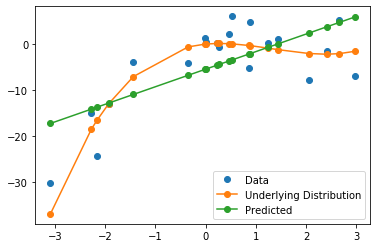

In [0]:
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

In [0]:
print('RMSE: ', rmse(yPred, y))

RMSE:  6.839531223681816


#### What to do next?

Can we add more features.

In [0]:
X = np.vstack((X.T, xD**2, xD**3)).T

In [0]:
# analytical solution
w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

# prediction
yPred4Feature = yPred = np.dot(X, w)

In [0]:
w

array([[ 0.04177438],
       [ 2.58652514],
       [-1.87142105],
       [ 0.19655185]])

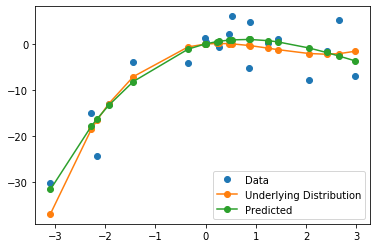

In [0]:
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

In [0]:
print('RMSE: ', rmse(yPred, y))

RMSE:  3.929493007090521


But how do we know when to stop, since we would not be knowing when to stop adding features in x.

In [0]:
X = np.vstack((X.T, xD**4, xD**5, xD**6, xD**7)).T

In [0]:
# analytical solution
w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

# prediction
yPred8Feature = yPred = np.dot(X, w)

In [0]:
w

array([[-2.64611130e-01],
       [ 8.28612458e+00],
       [-2.07703327e+00],
       [-6.35661778e+00],
       [-1.30720676e-02],
       [ 1.64293567e+00],
       [-2.08380043e-03],
       [-1.09229711e-01]])

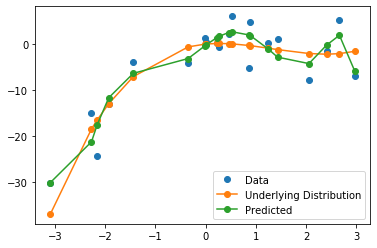

In [0]:
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

In [0]:
print('RMSE: ', rmse(yPred, y))

RMSE:  3.3097843019929725


Even though RMSE here (with much more higher features) is lower than previous case, we can see this Predicted Line is quite far from the Underlying distribution. This is called **Overfitting**.

When does the model overfits: when we have more features or comparitively less data for the model.

What exactly is overfitting:
It pays more attention to the noise of the data provided, in a sense trying to rotely memorize everything, 
without generalizing. 

Since we don't know when to stop adding features, what can be done:
- Solution is to work with a model or feature set that can slightly overfit your data, and then use techniques to prevent overfitting from happening.
The alternative gives us underfitting which we cannot fix unless you modify the feature set or model.

Options we have to prevent overfitting. Well there are many, most widely used ones are
- Using a validation set
- Regularization: add penalty on weights

In [0]:
λ = 10 # what is lambda: regularization parameter
f = 8 # number of features

In [0]:
# analytical solution
w = np.dot(np.linalg.inv(np.dot(X.T, X) + (λ)*np.identity(f)), np.dot(X.T, y))

# prediction
yPred8FeatRegu = yPred = np.dot(X, w)
w

array([[ 0.21326186],
       [ 0.40727946],
       [-0.46745243],
       [-0.31891582],
       [-0.51080301],
       [ 0.38864889],
       [ 0.03613141],
       [-0.03367748]])

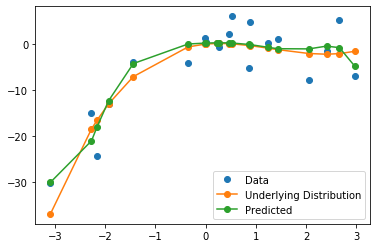

In [0]:
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

Can we know from the plot if the value of λ is optimal:

Somewhat but not exactly. 

To get the exact value of lambda you need to split dataset between training and testing. Then cycle over multiple values of lambda. The most optimum is the one which gives the lowest test error. 

What does low test error represent?

All models together:

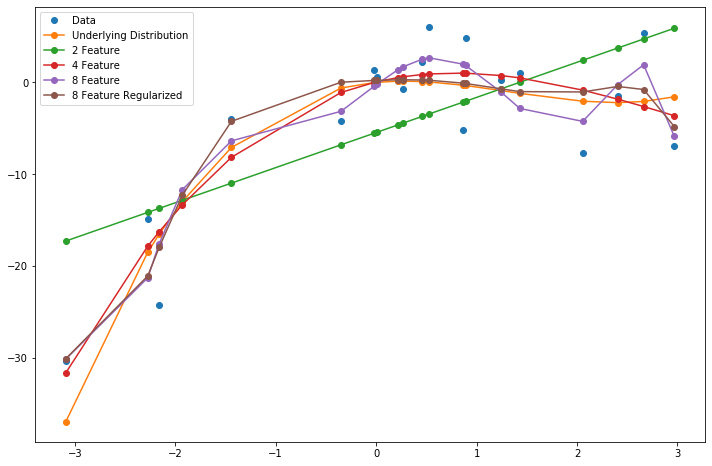

In [0]:
plt.figure(figsize=(12, 8))
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPredLinear, 'o-', label='2 Feature')
plt.plot(xD, yPred4Feature, 'o-', label='4 Feature')
plt.plot(xD, yPred8Feature, 'o-', label='8 Feature')
plt.plot(xD, yPred8FeatRegu, 'o-', label='8 Feature Regularized')

plt.legend()
plt.show()

### Further Complex Multivariate Data

We will take the Housing dataset which contains information about different houses in Boston. This data was originally a part of UCI Machine Learning Repository and has been removed now. We can also access this data from the scikit-learn library. There are 506 samples and 13 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features.

In [0]:
from sklearn.datasets import load_boston
dataset = load_boston()

In [0]:
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [0]:
print(dataset.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


We can see that the target value by the name MEDV is missing from the dataframe. It is present in dataset.target.
Let's add that to the df.

In [0]:
df['MEDV'] = dataset.target

Are there any null values in the dataset?

In [0]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Even though there are none, it's a good practice to check.

#### Exploratory Data Analysis

We here use distplot method from the seaborn library, which is another popular graphing library for Python.

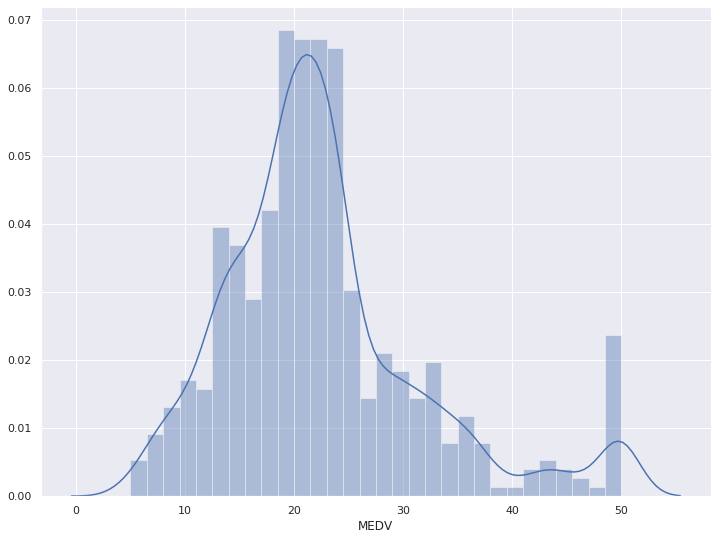

In [0]:
sns.set(rc={'figure.figsize':(12, 9)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

We can see that it mostly normally distributed with a few outliers.

## Linear Regression - Assignment

We'll work with the above dataset for the assignment below. Create a blank notebook for the assignment.

### Question 1

1. Normalize the data using StandardScaler from sklearn. [0.5]
2. Split the multivariate data into training/validation data (20% validation data) and plot train error and validation error as a function of the lambda regularizer. [1]
3. What is the best lambda where the best fit occurs? Use this best lambda from here on out. [Note: You may be surprised by the best lambda here - this won't be the case for all datasets.] [1] **Since ideal value of lambda is data-dependent, so we tune dataset. Correspondingly, the best value of lamba is 0!**

In [0]:
from sklearn.preprocessing import StandardScaler
df_std=StandardScaler().fit_transform(df)
df_std=pd.DataFrame(df_std)

Text(0, 0.5, 'MSE')

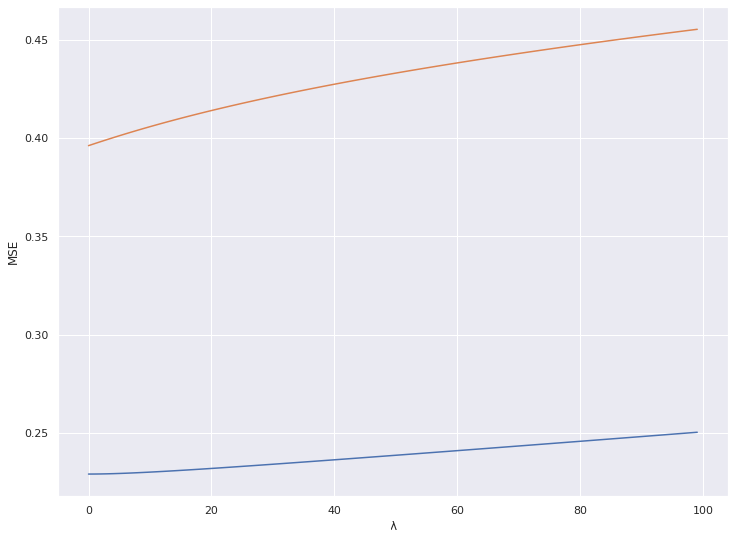

In [0]:
from sklearn.model_selection import train_test_split
X=df_std.iloc[:,0:-1]
y=df_std.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
X_train_bias=np.c_[np.ones(len(X_train)),X_train]
X_test_bias=np.c_[np.ones(len(X_test)),X_test]
λ=[]
MSE=[]
MSE_validation=[]
f=14
for i in range(0,100):
  λ.append(i)
  w = np.dot(np.linalg.inv(np.dot(X_train_bias.T, X_train_bias) + (i)*np.identity(f)), np.dot(X_train_bias.T, y_train))
  yPred_Regu = np.dot(X_train_bias, w)
  yPred_val = np.dot(X_test_bias, w)
  MSE.append(mean_squared_error(yPred_Regu, y_train))
  MSE_validation.append(mean_squared_error(yPred_val, y_test))
plt.plot(λ,MSE,λ,MSE_validation)  
plt.xlabel('λ')
plt.ylabel('MSE')

### Question 2

1. Derive the gradient of the $L_2$ regularized objective for Linear Regression, $\frac{\partial}{\partial \theta_j}J(\theta)$. Show your work (either by using in-line equations like we do here, or taking a picture of your work, and emdedding it in the notebook). [1] **If you could not find the image, please go to the following link:**
https://drive.google.com/file/d/18HI3M58PVDfLLWIYHO9_kjK2RzTyLobx/view?usp=sharing

<img src="https://drive.google.com/uc?id=18HI3M58PVDfLLWIYHO9_kjK2RzTyLobx">

### Question 3

1. Implement batch gradient descent for linear regression using a fixed learning rate $\eta$ of 1e-2. [1.5]

2. Run the gradient descent for a fixed number of epochs (based on convergence) and verify that the results closely approximate the matrix solution with the same lambda. [1]

Convergence will be happend at 5117 iterations.
Percentage of difference between analytical and gradient descent is [7.7869794]%
Percentage of difference between analytical and gradient descent is [1.57951605]%
Percentage of difference between analytical and gradient descent is [2.34971213]%
Percentage of difference between analytical and gradient descent is [68.94078103]%
Percentage of difference between analytical and gradient descent is [-2.00979352]%
Percentage of difference between analytical and gradient descent is [1.15450222]%
Percentage of difference between analytical and gradient descent is [-0.57763251]%
Percentage of difference between analytical and gradient descent is [-16.4427174]%
Percentage of difference between analytical and gradient descent is [-0.02652234]%
Percentage of difference between analytical and gradient descent is [8.77117078]%
Percentage of difference between analytical and gradient descent is [10.84129653]%
Percentage of difference between analytical a

Text(0, 0.5, 'MSE')

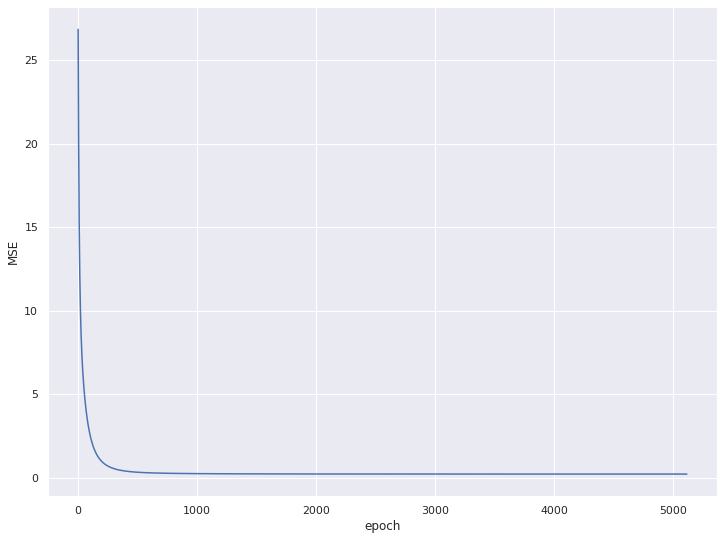

In [0]:
def batchGradientDescent(X, y, w, lr, iterations):
  m, n = X.shape
  y=np.array(y)
  MSE = np.zeros(iterations)
  costHistory = np.zeros(iterations)
  W=[]
  timeHistory = np.zeros(iterations)
  #X=np.c_[np.ones(len(X)),X]
  for i in range(iterations):
      prediction = np.dot(X,w)
      MSE[i] = mean_squared_error(prediction, y)
      w = w -(1/m)*lr*(X.T.dot((prediction - y.reshape(-1,1))))
      W.append(w)
      timeHistory[i] = i
  return timeHistory, MSE, W

lr =0.01                    #learning rate 𝜂  
iterations =8000            #epoch
w=np.random.randn(14,1)
timeHistory, MSE,w = batchGradientDescent(X_train_bias, y_train, w, lr, iterations)

convergence=0.0000001
w_evi=np.dot(np.linalg.inv(np.dot(X_train_bias.T, X_train_bias)), np.dot(X_train_bias.T, y_train))
for i in range(iterations):
  if abs(MSE[i]-MSE[i-1])<convergence:
    print("Convergence will be happend at",i, "iterations.")
    w_result=w[i]
    break

w_compare=w_result-w_evi.reshape(-1,1)
for j in range(14):
  print("Percentage of difference between analytical and gradient descent is {}%".format(w_compare[j]/w_result[j]*100))

plt.plot(timeHistory[:i], MSE[:i])
plt.xlabel('epoch')
plt.ylabel('MSE')

    

### Question 4

1. Plot training error performance vs. number of epochs as a function of learning rate $\eta$ for a range of values {1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1} with each $\eta$ being a different line. [1]

For very low $\eta$, gradient descent should be slow to converge.  For very high $\eta$, the error might be very unstable (i.e., not decreasing on every epoch).

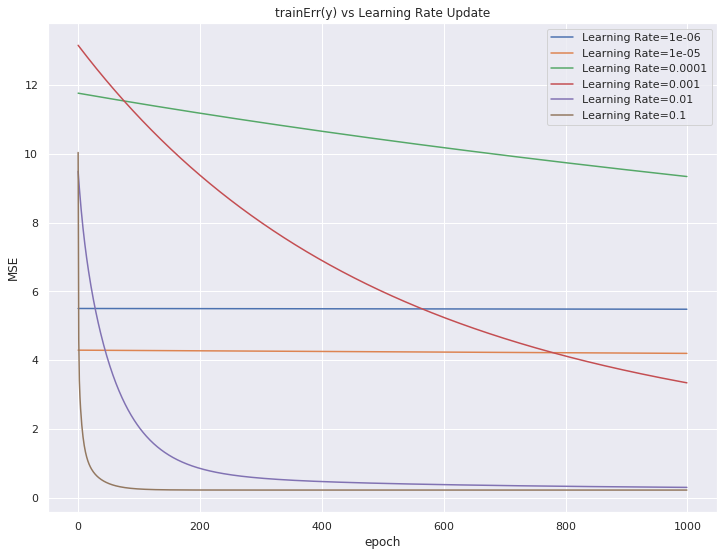

In [0]:
iterations =1000 

for i in [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]:
  w=np.random.randn(14,1)
  timeHistory, MSE, W = batchGradientDescent(X_train_bias, y_train, w, i, iterations)
  plt.plot(timeHistory, MSE,label='Learning Rate={}'.format(i))
  plt.title("trainErr(y) vs Learning Rate Update")
  plt.xlabel('epoch')
  plt.ylabel('MSE')
  plt.legend()


### Question 5

Implement a mini-batch version with a batch_size constant B.  When B=1, it is stochastic gradient descent.  When B=#train data points, it is full-batch.  Anywhere in between is mini-batch.  

1. Choose B=1, B=16, B=128, B=256, and B=#data points and plot training error as a function of "# of gradient updates" and also separately as a function of "wall-clock time" for each value of B. [2]

2. All lines should be on the same plot. Which B leads to fastest convergence in terms of #gradient updates and in terms of "wall-clock time"? [1] Considering trainErr vs Gradient Descent Update, it can be infered that B=404 has fastet convergence in terms of converging at lower epochs.

In [0]:
import time
def minibatch_gradient_descent(X,y,w,learning_rate,iterations,batch_size):
    
    m, n = X.shape
    y=np.array(y)
    X=np.array(X)
    MSE = np.zeros(iterations)
    timeHistory = np.zeros(iterations)
    n_batches = int(m/batch_size)
    grad_error=[]
    num=0
    s=[]
    X_original_biased = np.c_[np.ones(len(X)),X]
    y_original = y 
    Time = []

    for j in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]   
            X_i = np.c_[np.ones(len(X_i)),X_i]           
            prediction = np.dot(X_i,w)
            prediction_original = np.dot(X_original_biased,w)

            grad_error.append(mean_squared_error(prediction_original, y_original))
            w = w -(1/m)*learning_rate*(X_i.T.dot((prediction - y_i.reshape(-1,1))))
            cost += mean_squared_error(prediction, y_i) 
            num+=1  
            s.append(num)
            Time.append(time.time())

        MSE[j] = cost
        timeHistory[j] = j
        TimeElapsed = np.array(np.array(Time)-Time[0])


        
    return MSE, timeHistory, grad_error, s, TimeElapsed
    

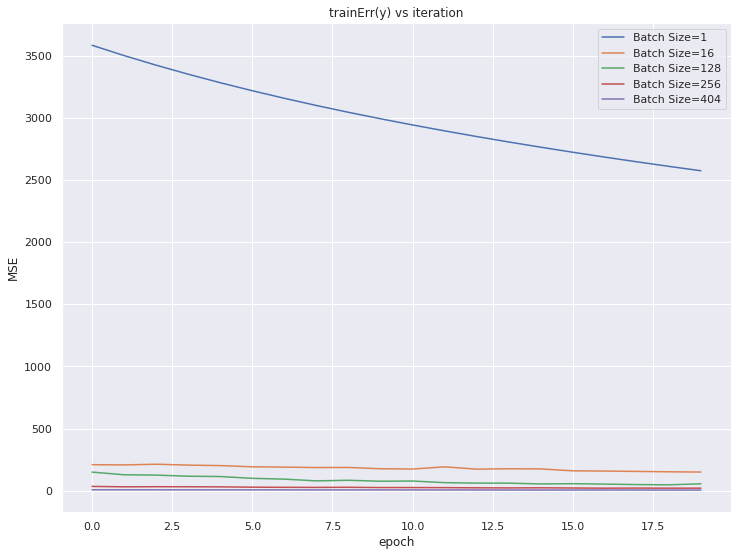

In [0]:

iterations=20
learning_rate=0.01
for B in [1, 16, 128, 256, 404]:
  w=np.random.randn(14,1)
  a,b,c,d, TimeElapsed=minibatch_gradient_descent(X_train,y_train,w,learning_rate,iterations,B)
  plt.plot(b,a, label='Batch Size={}'.format(B))
  plt.title("trainErr(y) vs iteration")
  plt.xlabel('epoch')
  plt.ylabel('MSE')
  plt.legend()



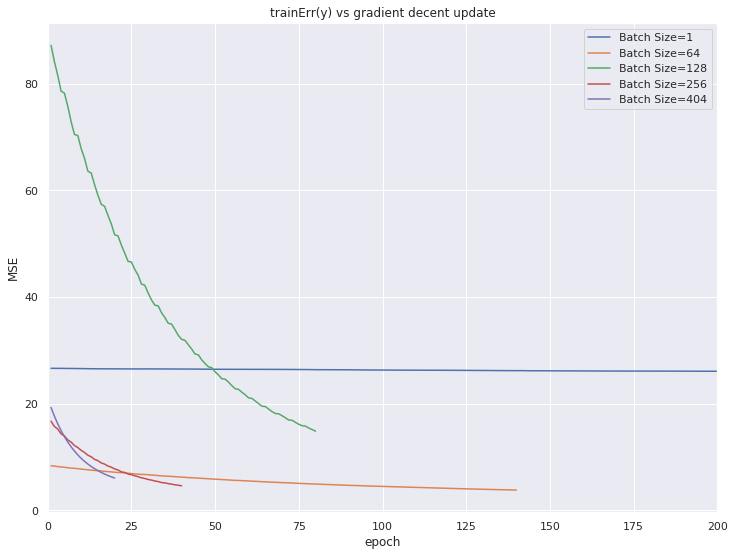

In [0]:
iterations=20
for B in [1,64,128, 256, 404]:
  w=np.random.randn(14,1)
  a,b,c,d, TimeElapsed=minibatch_gradient_descent(X_train,y_train,w,learning_rate,iterations,B)
  plt.plot(d,c, label='Batch Size={}'.format(B))
  plt.xlim(0,200)
  plt.title("trainErr(y) vs gradient decent update")
  plt.xlabel('epoch')
  plt.ylabel('MSE')
  plt.legend()

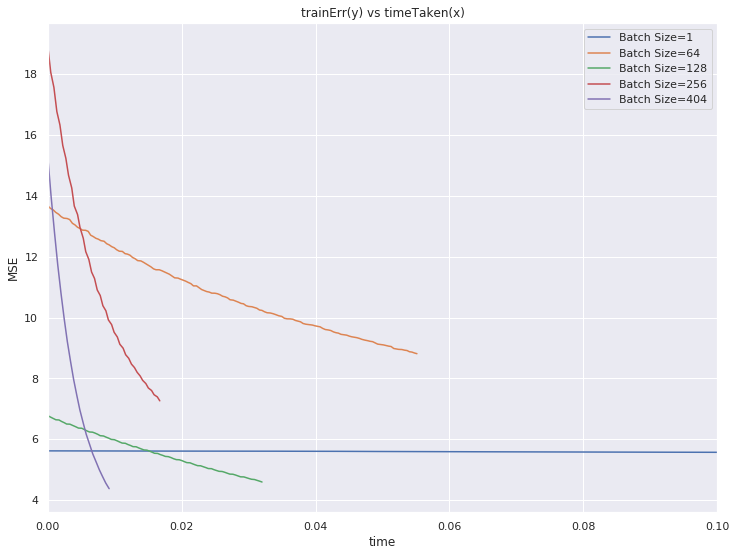

In [0]:
iterations=20
for B in [1,64,128, 256, 404]:
  w=np.random.randn(14,1)
  a,b,c,d, TimeElapsed=minibatch_gradient_descent(X_train,y_train,w,learning_rate,iterations,B)
  plt.plot(TimeElapsed,c, label='Batch Size={}'.format(B))
  plt.xlim(0,0.1)
  plt.title("trainErr(y) vs timeTaken(x)")
  plt.xlabel('time')
  plt.ylabel('MSE')
  plt.legend()

### Question 6

1. Switch to absolute error for loss but still use $L_2$ regularization. Derive the gradient for this case, $\frac{\partial}{\partial \theta_j}J(\theta)$. [1.5] **If you could not find the image, please go to the following link:**
https://drive.google.com/file/d/16eyBACdJZwuUerC40gqv3AW41qKSLDYS/view?usp=sharing

2. Tune $\eta$ and B to obtain good performance (fast convergence to minimum error, but not noisy).  Is it easier to train with squared error or absolute error, why?  Show some plots that help you demonstrate this point and explain. [1] **In my view, absolute error will result in faster convergence. As referred in my calculation, it adds “absolute value of magnitude” of coefficient as penalty term to the loss function. Therefore, it shrinks the less important feature’s coefficient to zero, thereby removing some feature altogether. Besides, this works well for feature selection in case we have a huge number of features.**

<img src="https://drive.google.com/uc?id=16eyBACdJZwuUerC40gqv3AW41qKSLDYS">

### Question 7 (Optional)

1. Does the model perform better if polynomial features are added (Use sklearn.preprocessing.PolynomialFeatures to test it out).


2. Does the optimal value of λ (regularization constant) change with this new set of features added.

## References

Linear Regression:
1. https://sebastianraschka.com/faq/docs/closed-form-vs-gd.html

Gradient Descent (images and equations):
1. https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
2. https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2

Author: Parth Jaggi